# DATA 550 Mini-Project 2

- Group 14: Nathan Smith / Mitch Harris
- Date: Feb 11, 2021

In [37]:
import pandas as pd
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

## Step 1: Describe the Dataset

The boardgame dataset includes boardgames with their descriptions, general game details, and user ratings from the [Board Game Geek website](http://boardgamegeek.com/). 

The dataset was obtained from the R4DS TidyTuesday 2019-03-12 Github repository: https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-03-12. As described in the repository, the data comes from the Board Game Geek website database and general cleaning of the dataset has already been completed. The general cleaning limited the dataset to games with at least 50 ratings and for games between 1950 and 2016. The repository notes that this was done to follow a previous analysis completed by [fivethirtyeight](https://fivethirtyeight.com/features/designing-the-best-board-game-on-the-planet/).

The dataset columns descriptions as provided in the Github repository are as follows:

|variable       |class     |description |
|:--------------|:---------|:-----------|
|game_id        |character | Unique game identifier         |
|description    |character | A paragraph of text describing the game       |
|image          |character | URL image of the game            |
|max_players    |integer   | Maximum recommended players           |
|max_playtime   |integer   | Maximum recommended playtime (min)           |
|min_age        |integer   | Minimum recommended age          |
|min_players    |integer   | Minimum recommended players         |
|min_playtime   |integer   | Minimum recommended playtime (min)           |
|name           |character | Name of the game           |
|playing_time   |integer   | Average playtime           |
|thumbnail      |character | URL thumbnail of the game           |
|year_published |integer   | Year game was published           |
|artist         |character | Artist for game art           |
|category       |character | Categories for the game (separated by commas)           |
|compilation    |character | If part of a multi-compilation - name of compilation           |
|designer       |character | Game designer           |
|expansion      |character | If there is an expansion pack - name of expansion           |
|family         |character | Family of game - equivalent to a publisher          |
|mechanic       |character | Game mechanic - how game is played, separated by comma         |
|publisher      |character | Comoany/person who published the game, separated by comma        |
|average_rating |double    | Average rating on Board Games Geek (1-10)        |
|users_rated    |double    | Number of users that rated the game           |  

# Step 2: Load the Dataset

In [38]:
boardgame_data = pd.read_csv('board_games.csv', parse_dates=['year_published'])
boardgame_data['year_published'] = pd.to_datetime(boardgame_data['year_published'], format='%Y')

Provide a view of the dataframe:

In [39]:
boardgame_data.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [40]:
boardgame_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   game_id         10532 non-null  int64         
 1   description     10532 non-null  object        
 2   image           10531 non-null  object        
 3   max_players     10532 non-null  int64         
 4   max_playtime    10532 non-null  int64         
 5   min_age         10532 non-null  int64         
 6   min_players     10532 non-null  int64         
 7   min_playtime    10532 non-null  int64         
 8   name            10532 non-null  object        
 9   playing_time    10532 non-null  int64         
 10  thumbnail       10531 non-null  object        
 11  year_published  10532 non-null  datetime64[ns]
 12  artist          7759 non-null   object        
 13  category        10438 non-null  object        
 14  compilation     410 non-null    object        
 15  de

## Step 3: Explore the Dataset

The view of the dataset from Step 2 shows that many of the categororical features (such as 'category', 'mechanic', and 'family') include multiple values for each entry. As such, these features may need to have their observations expanded during the analysis.

Look at a summary of the numerical columns in the dataset for reference during the EDA:

In [41]:
boardgame_data.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,9.003920,67655.000000


Also look at the number of missing values in the dataset:

In [42]:
len_df = len(boardgame_data)
print('Dataset length: ', len_df)
na_totals = boardgame_data.isnull().sum()
na_percent = na_totals / len_df * 100
na_df = pd.concat([na_totals, na_percent], axis=1)
na_df.columns = ['count_na', 'percent_na']
na_df

Dataset length:  10532


,count_na,percent_na
game_id,0,0.000000
description,0,0.000000
image,1,0.009495
max_players,0,0.000000
max_playtime,0,0.000000
min_age,0,0.000000
min_players,0,0.000000
min_playtime,0,0.000000
name,0,0.000000
playing_time,0,0.000000


The missing data summary shows the following:
- Game detail features (minimum age, minimum number of player, etc) and year published are not missing any data.
- Rating features are not missing data which is a function of the cleaning already completed for the dataset.
- The compilation and expansion features are missing values for most of the dataframe. However, the dataset descriptions for these columns note that they're for games that belong to compilations or have an expansion pack; therefore the lack of data may not just be due to missing values but from the fact that they do not have these.
- Game category is missing a very small number of entries such that it should not have a large impact on an anlaysis.
- There are a moderate number of missing entries for game family and mechanic which will need to be kept in mind during the analysis.
- There are a high number of missing values for artist and designer but there are almost no missing data for publisher.

## Step 4: Initial Thoughts

Initial thoughts on the dataset include:

- The game details features are complete in the dataset but from a quick view of the numeric summaries, there are values that may be erroneous and require filtering during wrangling or visualizations. For example:
    - 'max_players' has a maximum value of 999.
    - 'min_age' has a maximum value of 42.
    - 'min_players' has a minimum value of 0.
- There are also features in the dataset that have high outliers. For example, the maximum values for `min_playtime` and `playing_time` is 60,000 where the averages are 81 and 91, respectively.
- The dataset ranges from 1950 to 2016 but the 50th percentile for 'year_published' is 2007 indicating the most of the games in the dataset are more recent. This could be due to a higher number of games published more recently or due to lack of information/availability of older games.
- 'artist' and 'designer' should potentially be dropped from the dataset as they have a much higher number of missing values compared with 'publisher'.
- There appears to be a reasonable distribution from approximately 1 to 10 in the 'average_rating' feature but there is a high range in the 'users_rated' feature with values from a minimum of 50 to a maximum of over 65,000.

## Step 5: Wrangling

The following wrangling has been completed to support the data visualization complete in Step 7.

In [43]:
# Explode game categories 
category_ratings_df = boardgame_data.copy()
category_ratings_df['category'] = category_ratings_df['category'].str.split(",")
category_ratings_df = category_ratings_df.explode('category')
category_ratings_df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,Economic,NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,Negotiation,NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,Political,NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,Card Game,NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,Fantasy,NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478


In [44]:
# remove categories with total counts less than 200
category_ratings_df_cut = category_ratings_df.groupby('category').filter(lambda x: len(x) > 200)

In [45]:
# generate a list of median average rating based on category
category_by_rating = category_ratings_df_cut.groupby('category')["average_rating"].median().sort_values(ascending=False).index.to_list()

In [46]:
# highlighting for Figure 2 category subset
category_ratings_df_cut['highlight'] = False
category_ratings_df_cut.loc[category_ratings_df_cut['category'].isin(['Territory Building', 'Fantasy', 'Adventure', 'Horror', 'Card Game', 'Miniatures', 'World War II', 'Wargame']), 'highlight'] = True

In [47]:
# removing outliers from game features (min/max players etc) 
features_df = boardgame_data.copy()
features_df = features_df[(features_df['max_players'] < 20) & (features_df['max_players'] > 0) & (features_df['min_players'] > 0)]
features_df = features_df[(features_df['min_playtime'] <= 1000) & (features_df['max_playtime'] <= 2000)]
features_df.max_players = features_df.max_players.astype(int)
features_df.min_players = features_df.min_players.astype(int)

In [56]:
# re read to get date as non-datetime object
boardgame_data = pd.read_csv('board_games.csv')
number_of_categories = boardgame_data.copy()
number_of_mechanics = boardgame_data.copy()

# map the number of categories to a column
number_of_categories = number_of_categories.dropna(subset=["category"])
number_of_categories = number_of_categories.dropna(subset=["mechanic"])
number_of_categories["complexity_value"] = [len(x.split(",")) for x in number_of_categories["category"]]
number_of_categories["complexity_type"] = "number of categories"

# map the number of mechanics to a column
number_of_mechanics = number_of_mechanics.dropna(subset=["mechanic"])
number_of_mechanics = number_of_mechanics.dropna(subset=["category"])
number_of_mechanics["complexity_value"] = [len(x.split(",")) for x in number_of_mechanics["mechanic"]]
number_of_mechanics["complexity_type"] = "number of mechanics"

# join the two dataframes to facet on later
combined = pd.concat([number_of_mechanics, number_of_categories])

# bin on decade
combined["decade"] = [int((str(x)[0:-1])+"0") for x in combined["year_published"]]

In [68]:
# count number of board games produced by each publisher
v = boardgame_data.publisher.value_counts()

# top 10 most publishers by games produced
top_publishers = set(v[0:10].index)
top_10_publishers_by_count = boardgame_data[boardgame_data["publisher"].isin(top_publishers)]

## Step 6: Research Questions

The following research questions are based on the descriptions of the features available in the dataset and the initial exploration above:

- Are newer games more popular than older games? Note that popularity can be looked at both in terms of average rating and number of ratings? Number of ratings could potentially be thought of as a proxy for number of users although there are a lot of assumptions associated with this as users of some categories may be more likely to post reviews.
- Which boardgame categories have higher average user ratings? 
- Which game publishers have games with higher average game ratings?
- Are there game features (mininum/maximum players and playtime) that correspond with higher average ratings?



An additional question not related to game rating is if games are getting more complex over time? This can be explored by looking at the number of categories/mechanics for games.

## Step 7: Data Analysis and Visualization

The first data analysis explores the popularity of boardgames based on published date. Popularity will be looked at both in terms of average rating and number of user ratings.

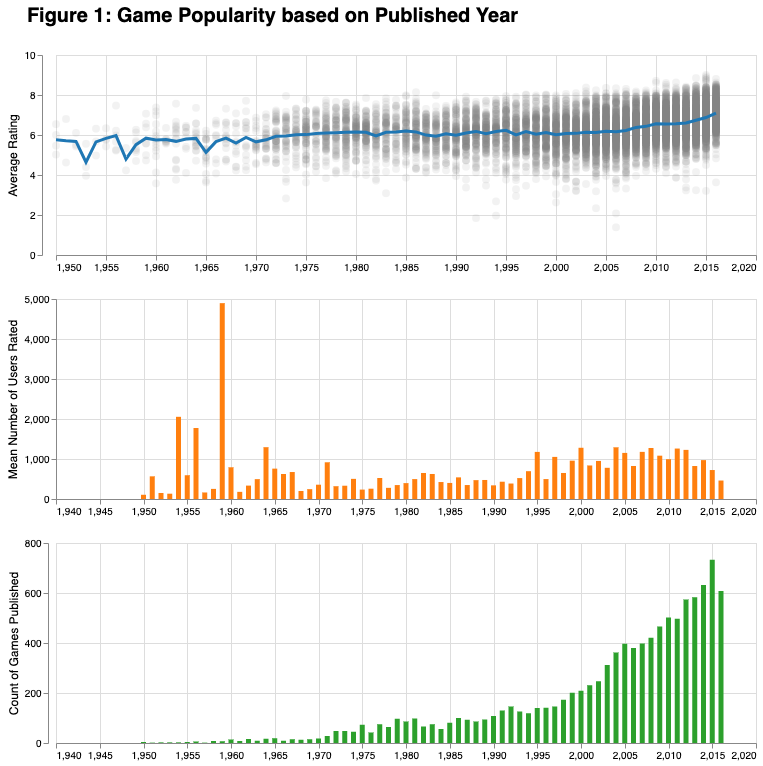

In [64]:
pa1 = (alt.Chart(boardgame_data).mark_circle(size=60, opacity = 0.1, color = 'grey').encode(
    alt.X('year_published',
          axis=alt.Axis(title=None),
          scale=alt.Scale(zero=False)
    ),
    alt.Y('average_rating',
         axis=alt.Axis(title='Average Rating',
                      titleFontSize=12,
                      offset=14,
                      titleFontWeight=500))
).properties(
    title=alt.TitleParams(
        text='Figure 1: Game Popularity based on Published Year',
        anchor='start',
        fontSize=20,
        dy=-20,
        dx=20),
    width=700,
    height=200
))

pa1 = pa1 + (alt.Chart(boardgame_data).mark_line(
    color='#1f77b4',
    size=3
).encode(
    x='year_published',
    y='mean(average_rating)'
))

pa2 = (alt.Chart(boardgame_data).mark_bar(color='#ff7f0e').encode(
    alt.X('year_published',
          axis=alt.Axis(title=None),
          scale=alt.Scale(zero=False)
    ),
    alt.Y('mean(users_rated)',
         axis=alt.Axis(title='Mean Number of Users Rated',
                      titleFontSize=12,
                      titleFontWeight=500))
).properties(
    width=700,
    height=200
))

pa3 = (alt.Chart(boardgame_data).mark_bar(color='#2ca02c').encode(
    alt.X('year_published',
          axis=alt.Axis(title=None),
          scale=alt.Scale(zero=False)
    ),
    alt.Y('count()',
         axis=alt.Axis(title='Count of Games Published',
                      titleFontSize=12,
                      offset=8,
                      titleFontWeight=500)) 
).properties(
    width=700,
    height=200
))

alt.vconcat(pa1, pa2, pa3)

Figure 1 indicates that the average rating of games based on published year increases steadily with time indicating that more recent games have higher ratings. The mean annual number of user ratings also appears to steadily increase based on published year. The figure indicates that there are some years that have a very high mean number of users rated; however, the count of games published indicates that these high values correspond with years that have very few games published. This likely corresponds with 'classic' games that are still heavily played and therefore have a high count of user ratings.

Overall, it appears that more recent games are more popular based on both number of user ratings and average rating. There is a slight drop in the mean number of users rated for the most recent years in the dataset, but this is may be because most recently published games are not as available compared with games that are a few years old.

The next analysis presented on Figure 2 looks at user rating scores as boxplots for boardgame categories. Note that boardgames in the dataset can have multiple categories; therefore, the dataset has modified for the analysis such that a single boardgame may be included in multiple categories. Additionally, any category with less than 200 games has been removed from the dataset to reduce the number of categories. The figure also provides the counts of boardgames in each category.

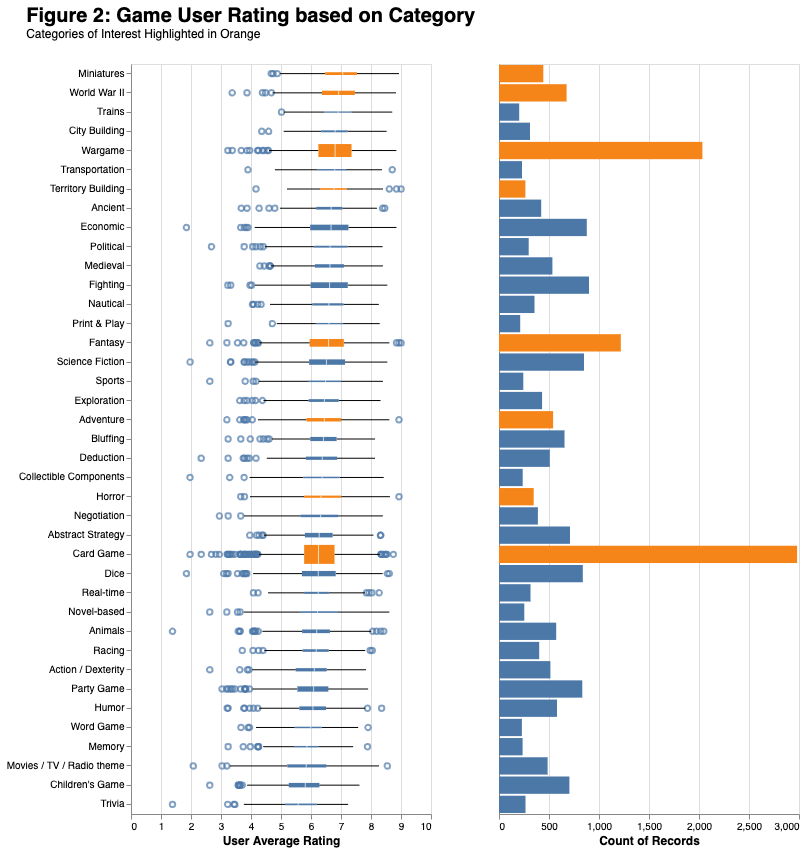

In [65]:
pb1 = (alt.Chart(category_ratings_df_cut).mark_boxplot().encode(
    x=alt.X('average_rating', title='User Average Rating'),
    y=alt.Y('category', sort=category_by_rating,
           axis=alt.Axis(title=None)),
    size=alt.Size('count()', legend=None),
    color=alt.Color('highlight', legend=None)
).properties(
    title=alt.TitleParams(
        text='Figure 2: Game User Rating based on Category',
        subtitle='Categories of Interest Highlighted in Orange',
        anchor='start',
        fontSize=20,
        dy=-20,
        dx=20),
    width=300,
    height=750
))

pb2 = (alt.Chart(category_ratings_df_cut).mark_bar().encode(
    x=alt.X('count()'),
    y=alt.Y('category', sort=category_by_rating,
           axis=alt.Axis(title=None, labels=False, ticks=False)),
    color=alt.Color('highlight', legend=None)
).properties(
    width=300,
    height=750
))

alt.hconcat(pb1, pb2).configure_axis(titleFontSize=12)

Figure 2 indicates that Miniatures and World War II games have the highest median user ratings; however, the figure also shows that there are categories that have games with very high ratings even though the category median rating is lower. For example, Territory Building, Fantasy, Adventure, Horror, and Card Games all have games with some of the highest ratings in the dataset as shown by the outliers on the boxplots. The figure also shows that the categories with the highest number of boardgames are Card Games, followed by Wargames and Fantasy.

The next figure will examine the top ten prolific publishers, by number of games, and their games' average scores.

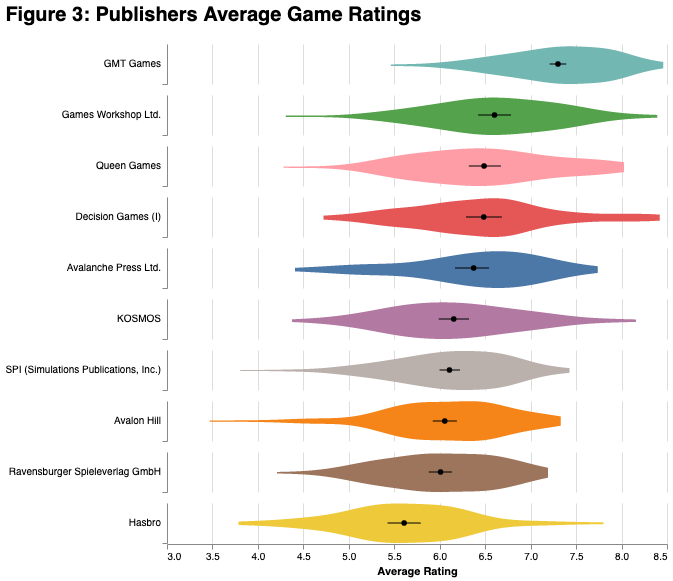

In [80]:
chart = alt.Chart(
    top_10_publishers_by_count
).transform_density(
    'average_rating',
    as_=['average_rating', 'density'],
    groupby=['publisher']
).mark_area(
    orient='vertical').encode(
    x=alt.X('average_rating:Q',
    title="Average Rating"
    ),
    color=alt.Color('publisher:N',legend=None),
    y=alt.Y(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
    )
)

rule = alt.Chart(
    top_10_publishers_by_count
).mark_circle(
    color='black'
).encode(
    x='mean(average_rating):Q'
)

error_bars = alt.Chart(top_10_publishers_by_count).mark_errorbar(extent='ci').encode(
  x=alt.X('average_rating', title="Average Rating")
)

chart_t = (
    chart + rule + error_bars
).properties(
    width=500,
    height=40
).facet(
    row=alt.Row(
        'publisher:N',
         header=alt.Header(
            labelAlign='left',
            title = None,
            labelAngle=0, 
            labelPadding=0, 
            ),
            sort=alt.EncodingSortField('average_rating', op='mean', order='descending'),
    )
).properties(
    title='Figure 3: Publishers Average Game Ratings',
).resolve_scale(
    y=alt.ResolveMode(
    "independent"
    )
).configure_facet(
    spacing=10
).configure_view(
    stroke=None
).configure_title(
#     dx = 160,
    dy = -15,
    fontSize=20,
)
chart_t

Figure 3 is sorted on average score for their games. It shows a large difference between first and second place's average scores. GMT Games has an average game rating of approximately 7.3, and second place Games Workshop only has an average score of 6.6, the rest of the scores decrease more slowly. It is also noticeable that each manufacturer has a large spread in the average scores, and each of the ten spreads appear to be approximately equal.

The analysis now looks at several of the boardgame features to assess if higher user ratings correspond with any of the features. Figure 4 plots average user rating against minimum players, maximum players, minimum playtime, and maximum playtime.

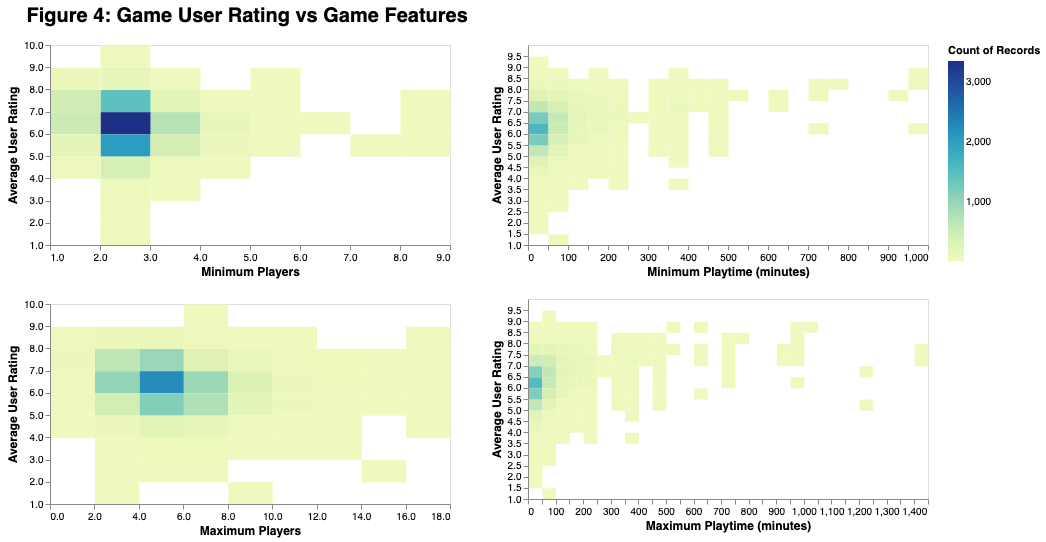

In [67]:
fig_height = 200
fig_width = 400

pa3 = (alt.Chart(features_df).mark_rect().encode(
    alt.X('min_playtime', bin=alt.Bin(maxbins=30), title='Minimum Playtime (minutes)'),
    alt.Y('average_rating', bin=alt.Bin(maxbins=30), title='Average User Rating',
    scale=alt.Scale(domain=(1, 10))),
    alt.Color('count()')
).properties(
    width=fig_width,
    height=fig_height
))

pb3 = (alt.Chart(features_df).mark_rect().encode(
    alt.X('max_playtime', bin=alt.Bin(maxbins=30), title='Maximum Playtime (minutes)'),
    alt.Y('average_rating', bin=alt.Bin(maxbins=30), title='Average User Rating',
    scale=alt.Scale(domain=(1, 10))),
    alt.Color('count()')
).properties(
    width=fig_width,
    height=fig_height
))

pc3 = (alt.Chart(features_df).mark_rect().encode(
    alt.X('min_players', bin=alt.Bin(maxbins=10), title='Minimum Players'),
    alt.Y('average_rating', bin=alt.Bin(maxbins=10), title='Average User Rating',
    scale=alt.Scale(domain=(1, 10))),
    alt.Color('count()')
).properties(
    width=fig_width,
    height=fig_height
).properties(
    title=alt.TitleParams(
        text='Figure 4: Game User Rating vs Game Features',
        anchor='start',
        fontSize=20,
        dy=-10,
        dx=20),
    width=fig_width,
    height=fig_height
))

pd3 = (alt.Chart(features_df).mark_rect().encode(
    alt.X('max_players', bin=alt.Bin(maxbins=10), title='Maximum Players'),
    alt.Y('average_rating', bin=alt.Bin(maxbins=10), title='Average User Rating',
    scale=alt.Scale(domain=(1, 10))),
    alt.Color('count()')
).properties(
    width=fig_width,
    height=fig_height
))


((pc3 & pd3) | (pa3 & pb3)).configure_axis(titleFontSize=12)

The figure indicates that minimum and maximum number of players do not really correspond with higher or lower average user ratings, although it does show that most games have between one to three minimum players and two to eight maximum players.

However, Figure 4 does indicate that games with longer minimum/maximum playtime appears to correspond with games that have higher user ratings. Most games have short playtimes (under say approximately 100 minutes), but games that have much longer gametimes tend to have user ratings that are generally higher. This potentially indicates that users that are willing to play a longer games do so because they enjoy the game versus shorter games that users may play even if they do not enjoy them as much due to the lower time commitment.

This next chart will examine if there is a trend in board games' complexity over time. Number of categories the game falls into will approximate thematic complexity, and number of game mechanics will stand in for game complexity.



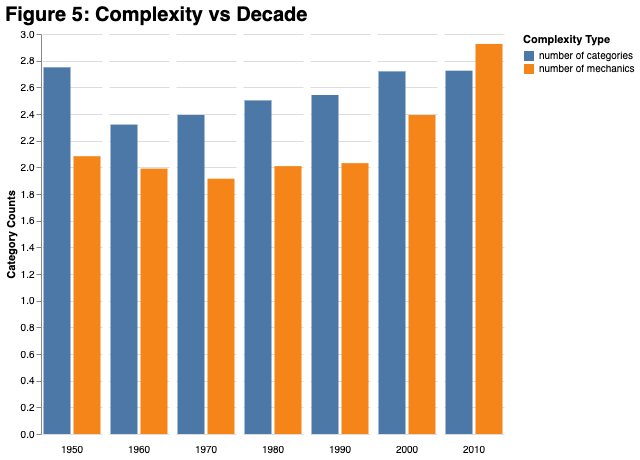

In [90]:
chart = alt.Chart(combined, title='Figure 5: Complexity vs Decade').mark_bar(
    opacity=1,
    ).encode(
    column = alt.Column('decade:O', spacing = 5, header = alt.Header(labelOrient = "bottom"), title=None),
    x =alt.X('complexity_type',  axis=None,),
    y =alt.Y('mean(complexity_value)', title="Category Counts"),
    color= alt.Color('complexity_type', legend=alt.Legend(title="Complexity Type"))
).configure_view(stroke='transparent'
).configure_title(
    dx = 0,
    fontSize=20,
).properties(
    width=60,
    height=400
)

chart.display()

Figure 5 shows that there is a lot of noise between 1950 - 1990, but after 1970 there is a steady increase in the average number of mechanics and the categories a game has.



## Step 8: Summary and Conclusion

The exploratory analysis indicates the following results:
- There are higher counts of more recently published boardgames in the dataset.
- Game popularity increases based on the publishing year based on both user rating score and number of ratings.
- The boardgames categories with the highest median user ratings are Miniatures and World War II, but Territory Building, Adventure, Fantasy, Horror, and Card Games all have games with some of the highest user ratings.
- Wargames, Card Games, and Fantasy Games have the highest numbers of published games.
- The top publishers by number of games created have roughly the variance in their game's score, just with different means.
- The most commost minimum and maximum numbers of players are one to three and two to eight, respectively, and the minimum and maximum number of players does not appear to corresponding with higher or lower user ratings.
- Longer games due tend to have higher average user ratings.

Follow up research questions:
- Number of game mechanics and number of categories the games fall into as a proxy for game complexity. To further explore game complexity we would need different data sets that included things like "number of pages in the rule book", "weight of the game in its box", or "number of pieces included". There may also exist a dataset with a subjective (like score) rating of a games complexity.
- Do boardgame ratings tend to be very consistent over time, or do they change. For example if a game was published in 2010 and one looked at the user ratings for the game in 2011, 2012, 2013 and so on, do the ratings change. This would require additional data corresponding user ratings at various points in time.